In [1]:
import keras
from keras import layers

In [2]:
encoding_dim = 32  
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)
autoencoder = keras.Model(input_img, decoded)
encoder = keras.Model(input_img, encoded)

In [3]:
encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [4]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [5]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [6]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50

235/235 [==============================] - 1s 4ms/step - loss: 0.2791 - val_loss: 0.1895
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1685 - val_loss: 0.1524
Epoch 3/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1443 - val_loss: 0.1341
Epoch 4/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1290 - val_loss: 0.1216
Epoch 5/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1184 - val_loss: 0.1128
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1108 - val_loss: 0.1065
Epoch 7/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1056 - val_loss: 0.1022
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1018 - val_loss: 0.0990
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0992 - val_loss: 0.0969
Epoch 10/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0974 - val_loss: 0.095

In [7]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 0s 779us/step


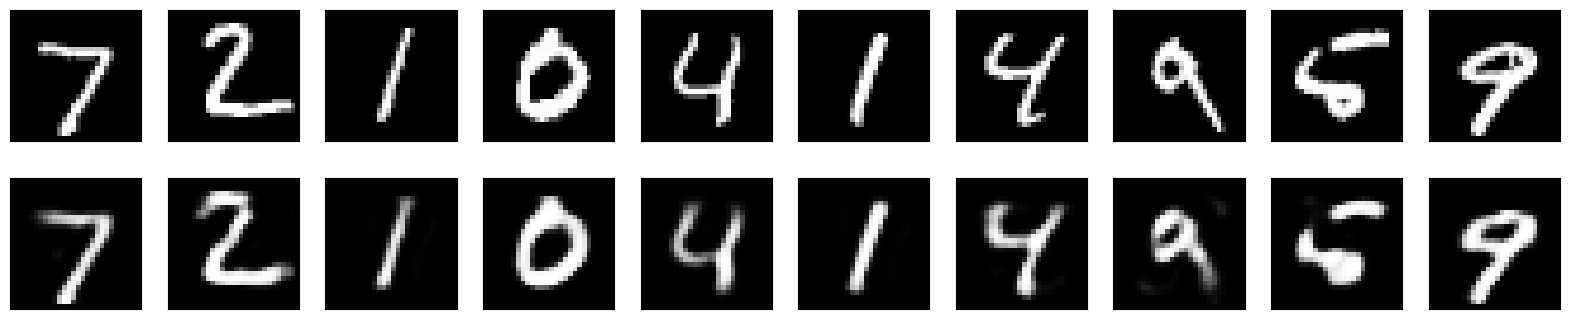

In [8]:
# Use Matplotlib 
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [10]:
#In the previous example, the representations were only constrained by the size of the hidden layer (32). In such a situation, 
# what typically happens is that the hidden layer is learning an approximation of PCA (principal component analysis).
# But another way to constrain the representations to be compact is to add a sparsity contraint on the activity of the hidden 
# representations, so fewer units would "fire" at a given time. In Keras, this can be done by adding an activity_regularizer to our Dense layer:

In [12]:
from keras import regularizers
encoding_dim = 32
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(encoding_dim, activation='relu',activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)
autoencoder = keras.Model(input_img, decoded)
encoder = keras.Model(input_img, encoded)
encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [13]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [14]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [15]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2870 - val_loss: 0.1984
Epoch 2/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1782 - val_loss: 0.1613
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1519 - val_loss: 0.1416
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1363 - val_loss: 0.1296
Epoch 5/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1265 - val_loss: 0.1213
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1196 - val_loss: 0.1157
Epoch 7/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1149 - val_loss: 0.1119
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1116 - val_loss: 0.1093
Epoch 9/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1094 - val_loss: 0.1075
Epoch 10/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1080 - val_loss: 0.1063

In [16]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 0s 776us/step


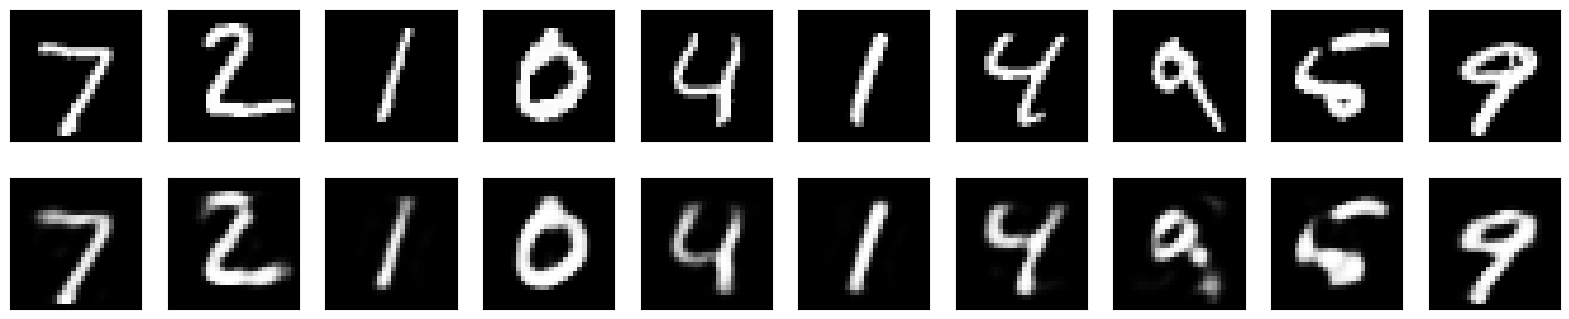

In [17]:
# Use Matplotlib 
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [18]:
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

In [19]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 3s 7ms/step - loss: 0.2540 - val_loss: 0.1735
Epoch 2/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1579 - val_loss: 0.1446
Epoch 3/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1386 - val_loss: 0.1309
Epoch 4/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1293 - val_loss: 0.1250
Epoch 5/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1236 - val_loss: 0.1191
Epoch 6/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1176 - val_loss: 0.1140
Epoch 7/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1131 - val_loss: 0.1097
Epoch 8/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1091 - val_loss: 0.1059
Epoch 9/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1061 - val_loss: 0.1041
Epoch 10/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1042 - val_lo

In [20]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 0s 818us/step


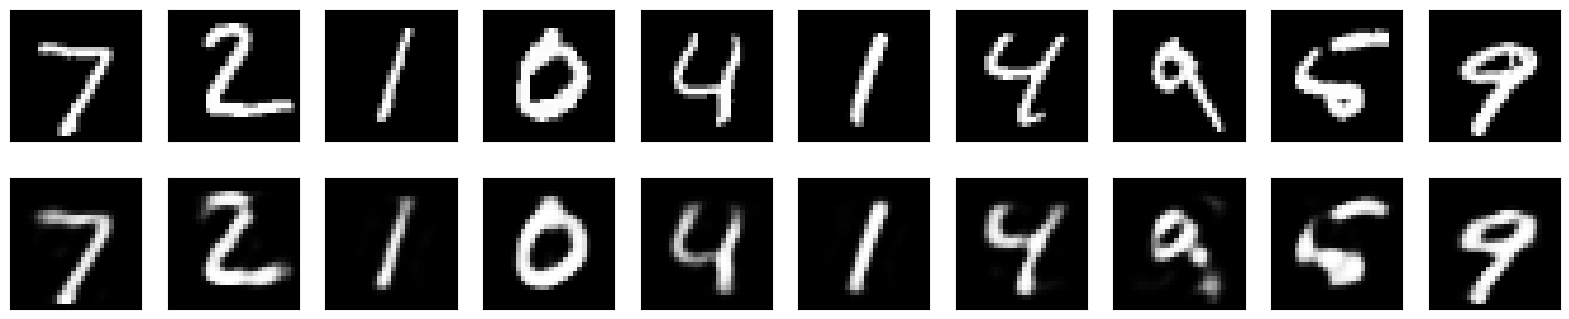

In [21]:
# Use Matplotlib 
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()